In [ ]:
dd

In [1]:
# hide
%load_ext nb_black
%matplotlib inline
%config InlineBackend.figure_format='retina'
%config IPCompleter.greedy=True

<IPython.core.display.Javascript object>

In [2]:
from torchvision import datasets, transforms
from torchvision.datasets import MNIST
from torchvision.datasets import FashionMNIST

from newremagine.core import train
from newremagine.core import test
from newremagine.core import plot_latent
from newremagine.core import plot_test

<IPython.core.display.Javascript object>

# Step 1. Train the VAE

As an example, we will use the easy to learn and visualize MINST data. This collection of handwritten digits is a classic example in ML. For a long while this was a "hard" thing to learn. Now it is very easy. 

In [7]:
train_dataset = MNIST(
    "data/", download=True, train=True, transform=transforms.ToTensor()
)

fraction = [1.0, 0.0, 0.0]
model, memory, loss = train(
    fraction, train_dataset, num_episodes=500, num_burn=100, lr=0.001, perfect=False
)
loss

1522.1884765625

<IPython.core.display.Javascript object>

# Step 2. Test the VAE

In [8]:
# test
test_dataset = MNIST(
    "data/", download=True, train=False, transform=transforms.ToTensor()
)
test(model, test_dataset)

1608187.662700653

<IPython.core.display.Javascript object>

# Step 3. Visualize

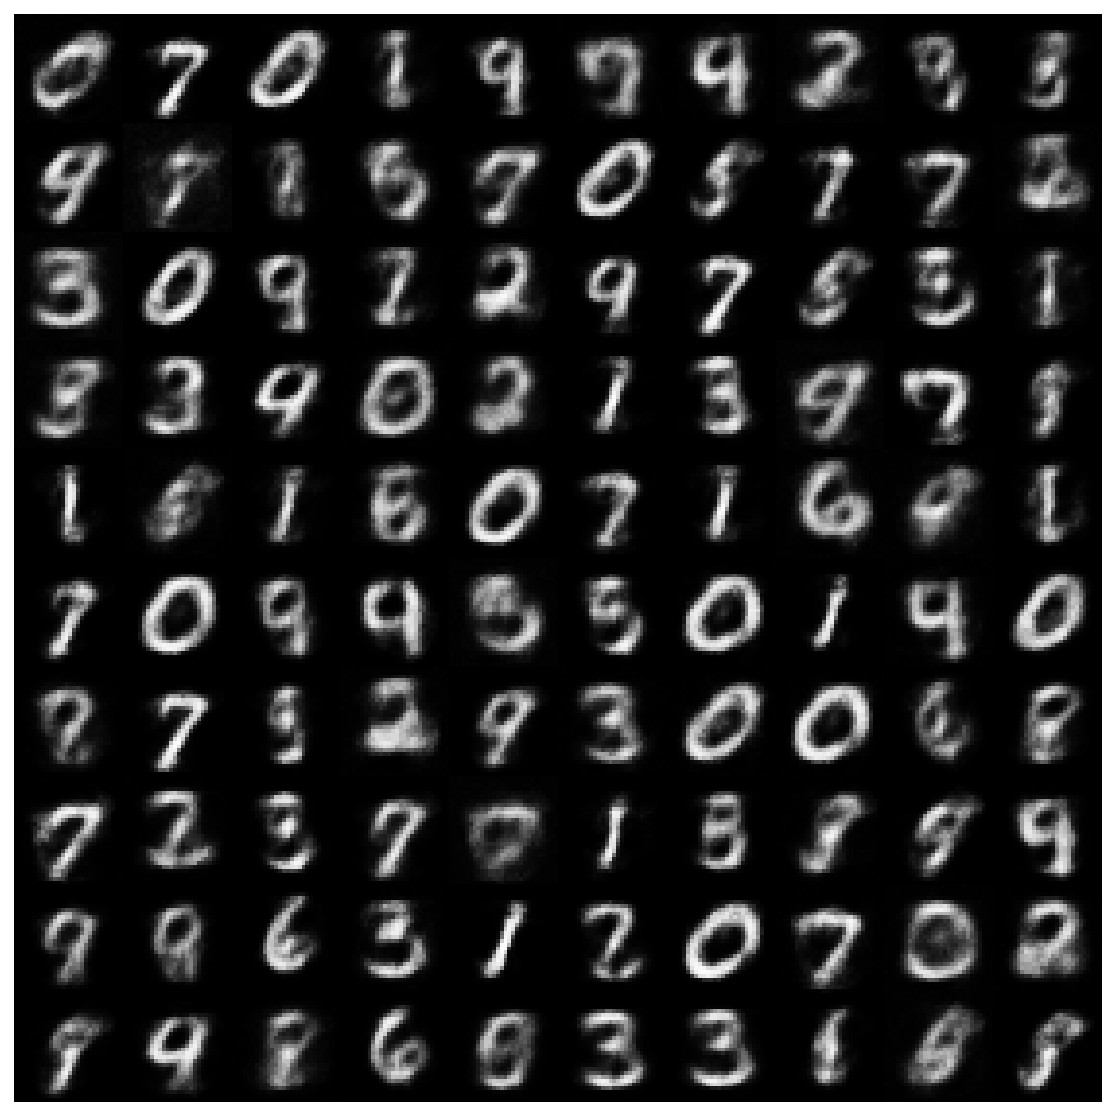

<IPython.core.display.Javascript object>

In [9]:
plot_test(test_dataset, model, 10)

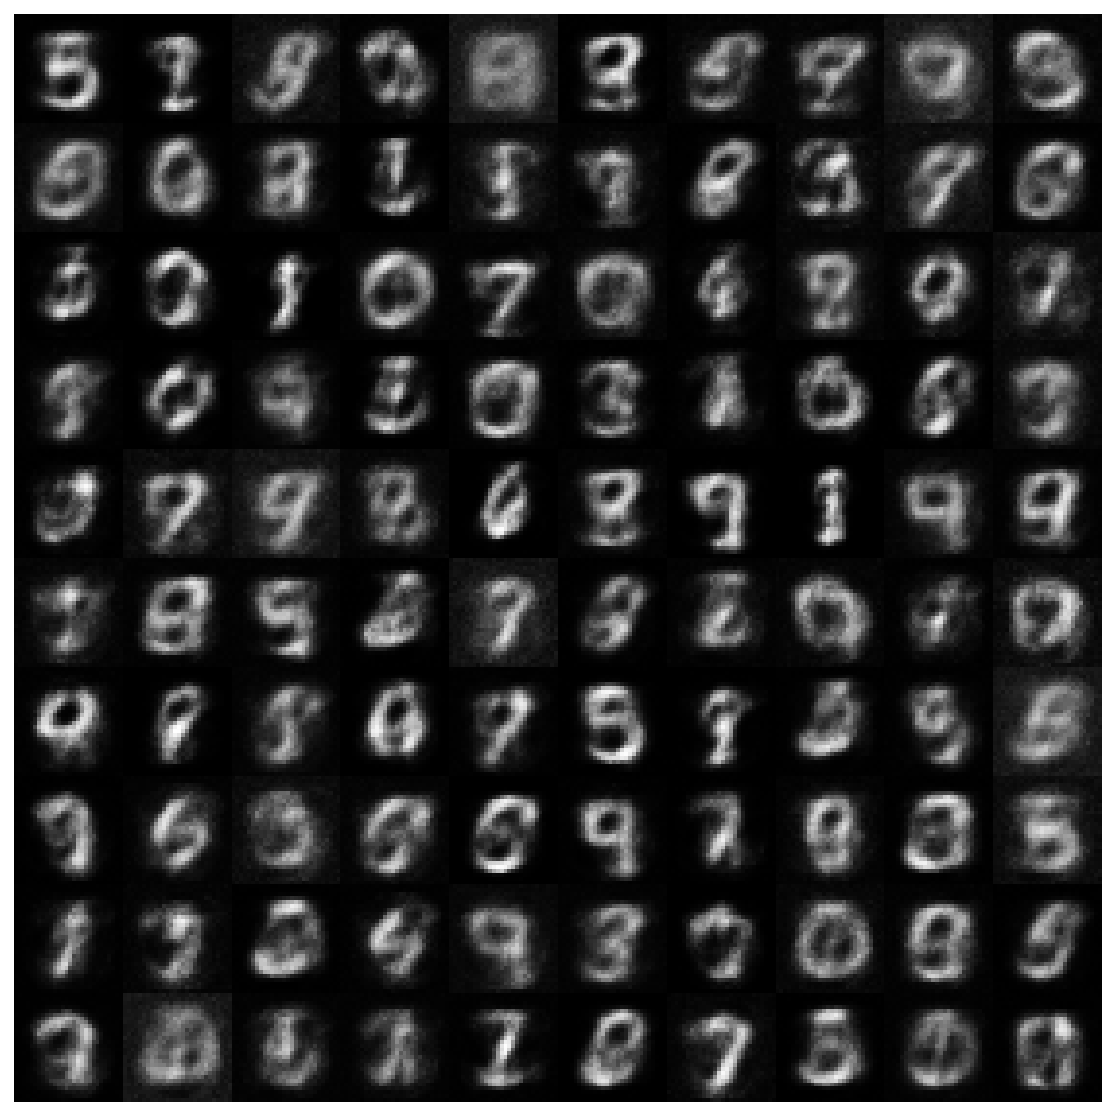

<IPython.core.display.Javascript object>

In [10]:
plot_latent(model, 10)